In [197]:
import nltk
import os
import json
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [198]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamerik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [199]:
with open('../dataset/en.json', 'r') as file:
    en = json.load(file)
with open('../dataset/ru.json', 'r') as file:
    ru = json.load(file)
with open('../dataset/kaz.json', 'r') as file:
    kz = json.load(file)

In [200]:
def get_chapters(dictionary):
    chapters = []
    for part, _ in dictionary.items():
        for chapter in dictionary[part]:
            chapters.append(chapter)
    return chapters

In [201]:
kz_chapters_part1, kz_chapters_part2 = get_chapters(kz)[2:9], get_chapters(kz)[10:]
en_chapters_part1, en_chapters_part2 = get_chapters(en)[:7], get_chapters(en)[7:]
ru_chapters_part1, ru_chapters_part2 = get_chapters(ru)[:7], get_chapters(ru)[7:]


# TTR(TYPE TOKEN RATION)
- Number of unique tokens ​/ Total number of tokens

In [202]:
stop_words_en = set(stopwords.words('english'))
stop_words_ru = set(stopwords.words('russian'))
stop_words_kz = set(stopwords.words('kazakh'))

In [203]:
def ttr_per_chapter(chapters_list, book_json, stopwords, part):
    ttr = {}
    for chapter in chapters_list:
        unique_words = set()
        total_words_count = 0
        for sentence in book_json[part][chapter]:
            for word in sentence:
                if word not in stopwords:
                    total_words_count += 1
                    if word not in unique_words:
                        unique_words.add(word)
        ttr[chapter] = {
            "unique_words_count": len(unique_words),
            "total_words_count": total_words_count,
        }
    return ttr

In [204]:
ttr_en_p1 = ttr_per_chapter(en_chapters_part1, en, stop_words_en, "part1")
ttr_en_p2 = ttr_per_chapter(en_chapters_part2, en, stop_words_en, "part2")
ttr_ru_p1 = ttr_per_chapter(ru_chapters_part1, ru, stop_words_ru, "part1")
ttr_ru_p2 = ttr_per_chapter(ru_chapters_part2, ru, stop_words_ru, "part2")
ttr_kz_p1 = ttr_per_chapter(kz_chapters_part1, kz, stop_words_kz, "part1")
ttr_kz_p2 = ttr_per_chapter(kz_chapters_part2, kz, stop_words_kz, "part2")

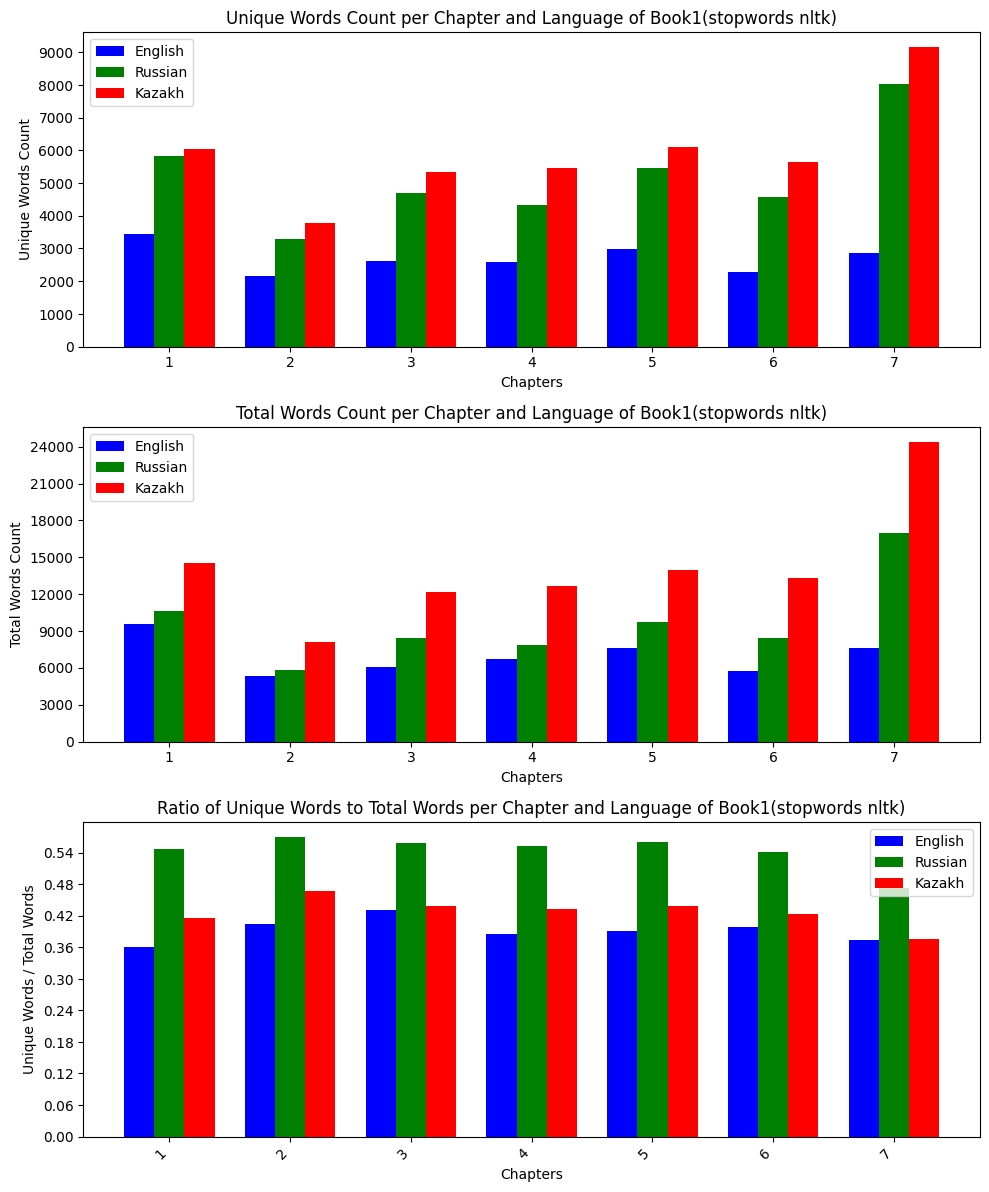

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# Language names
language_names = ['English', 'Russian', 'Kazakh']

# Language colors
language_colors = ['blue', 'green', 'red']

# Combine all data dictionaries
all_data = [ttr_en_p1, ttr_ru_p1, ttr_kz_p1]

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))  # Create subplots

# Plot for unique words count
index = np.arange(len(all_data[0]))
bar_width = 0.25

for i, data in enumerate(all_data):
    unique_counts = [chapter_data['unique_words_count'] for chapter_data in data.values()]
    chapters = list(data.keys())
    ax1.bar(index + i * bar_width, unique_counts, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for unique words count
ax1.set_xlabel('Chapters')
ax1.set_ylabel('Unique Words Count')
ax1.set_title('Unique Words Count per Chapter and Language of Book1(stopwords nltk)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(range(1, 8))
ax1.legend()

# Plot for total words count
for i, data in enumerate(all_data):
    total_counts = [chapter_data['total_words_count'] for chapter_data in data.values()]
    chapters = list(data.keys())
    ax2.bar(index + i * bar_width, total_counts, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for total words count
ax2.set_xlabel('Chapters')
ax2.set_ylabel('Total Words Count')
ax2.set_title('Total Words Count per Chapter and Language of Book1(stopwords nltk)')
ax2.set_xticks(index + bar_width)
ax2.set_xticklabels(range(1, 8))
ax2.legend()

# Plot for ratio of unique words to total words
for i, data in enumerate(all_data):
    unique_counts = [chapter_data['unique_words_count'] for chapter_data in data.values()]
    total_counts = [chapter_data['total_words_count'] for chapter_data in data.values()]
    ratios = [unique / total for unique, total in zip(unique_counts, total_counts)]
    ax3.bar(index + i * bar_width, ratios, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for ratio plot
ax3.set_xlabel('Chapters')
ax3.set_ylabel('Unique Words / Total Words')
ax3.set_title('Ratio of Unique Words to Total Words per Chapter and Language of Book1(stopwords nltk)')
ax3.set_xticks(index + bar_width)
ax3.set_xticklabels(range(1, 8))
ax3.legend()

# Increase y-axis ticks
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax3.yaxis.set_major_locator(plt.MaxNLocator())

# Adjust layout
plt.tight_layout()

# Show plot
plt.xticks(rotation=45, ha='right')
plt.show()

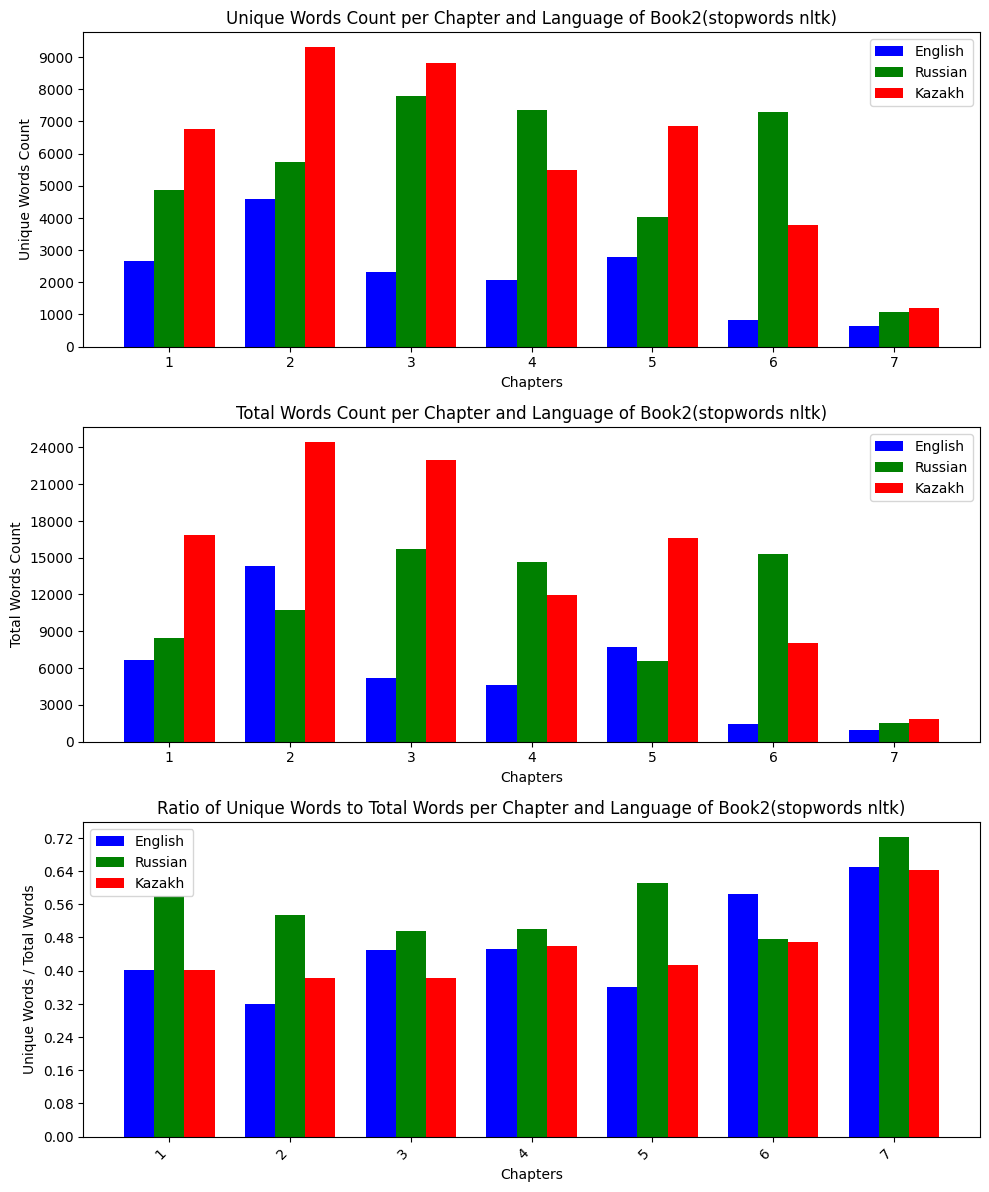

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Language names
language_names = ['English', 'Russian', 'Kazakh']

# Language colors
language_colors = ['blue', 'green', 'red']

# Combine all data dictionaries
all_data = [ttr_en_p2, ttr_ru_p2, ttr_kz_p2]

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))  # Create subplots

# Plot for unique words count
index = np.arange(len(all_data[0]))
bar_width = 0.25

for i, data in enumerate(all_data):
    unique_counts = [chapter_data['unique_words_count'] for chapter_data in data.values()]
    chapters = list(data.keys())
    ax1.bar(index + i * bar_width, unique_counts, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for unique words count
ax1.set_xlabel('Chapters')
ax1.set_ylabel('Unique Words Count')
ax1.set_title('Unique Words Count per Chapter and Language of Book2(stopwords nltk)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(range(1, 8))
ax1.legend()

# Plot for total words count
for i, data in enumerate(all_data):
    total_counts = [chapter_data['total_words_count'] for chapter_data in data.values()]
    chapters = list(data.keys())
    ax2.bar(index + i * bar_width, total_counts, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for total words count
ax2.set_xlabel('Chapters')
ax2.set_ylabel('Total Words Count')
ax2.set_title('Total Words Count per Chapter and Language of Book2(stopwords nltk)')
ax2.set_xticks(index + bar_width)
ax2.set_xticklabels(range(1, 8))
ax2.legend()

# Plot for ratio of unique words to total words
for i, data in enumerate(all_data):
    unique_counts = [chapter_data['unique_words_count'] for chapter_data in data.values()]
    total_counts = [chapter_data['total_words_count'] for chapter_data in data.values()]
    ratios = [unique / total for unique, total in zip(unique_counts, total_counts)]
    ax3.bar(index + i * bar_width, ratios, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for ratio plot
ax3.set_xlabel('Chapters')
ax3.set_ylabel('Unique Words / Total Words')
ax3.set_title('Ratio of Unique Words to Total Words per Chapter and Language of Book2(stopwords nltk)')
ax3.set_xticks(index + bar_width)
ax3.set_xticklabels(range(1, 8))
ax3.legend()

# Increase y-axis ticks
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax3.yaxis.set_major_locator(plt.MaxNLocator())

# Adjust layout
plt.tight_layout()

# Show plot
plt.xticks(rotation=45, ha='right')
plt.show()

In [207]:
ttr_en_p1 = ttr_per_chapter(en_chapters_part1, en, (), "part1")
ttr_en_p2 = ttr_per_chapter(en_chapters_part2, en, (), "part2")
ttr_ru_p1 = ttr_per_chapter(ru_chapters_part1, ru, (), "part1")
ttr_ru_p2 = ttr_per_chapter(ru_chapters_part2, ru, (), "part2")
ttr_kz_p1 = ttr_per_chapter(kz_chapters_part1, kz, (), "part1")
ttr_kz_p2 = ttr_per_chapter(kz_chapters_part2, kz, (), "part2")

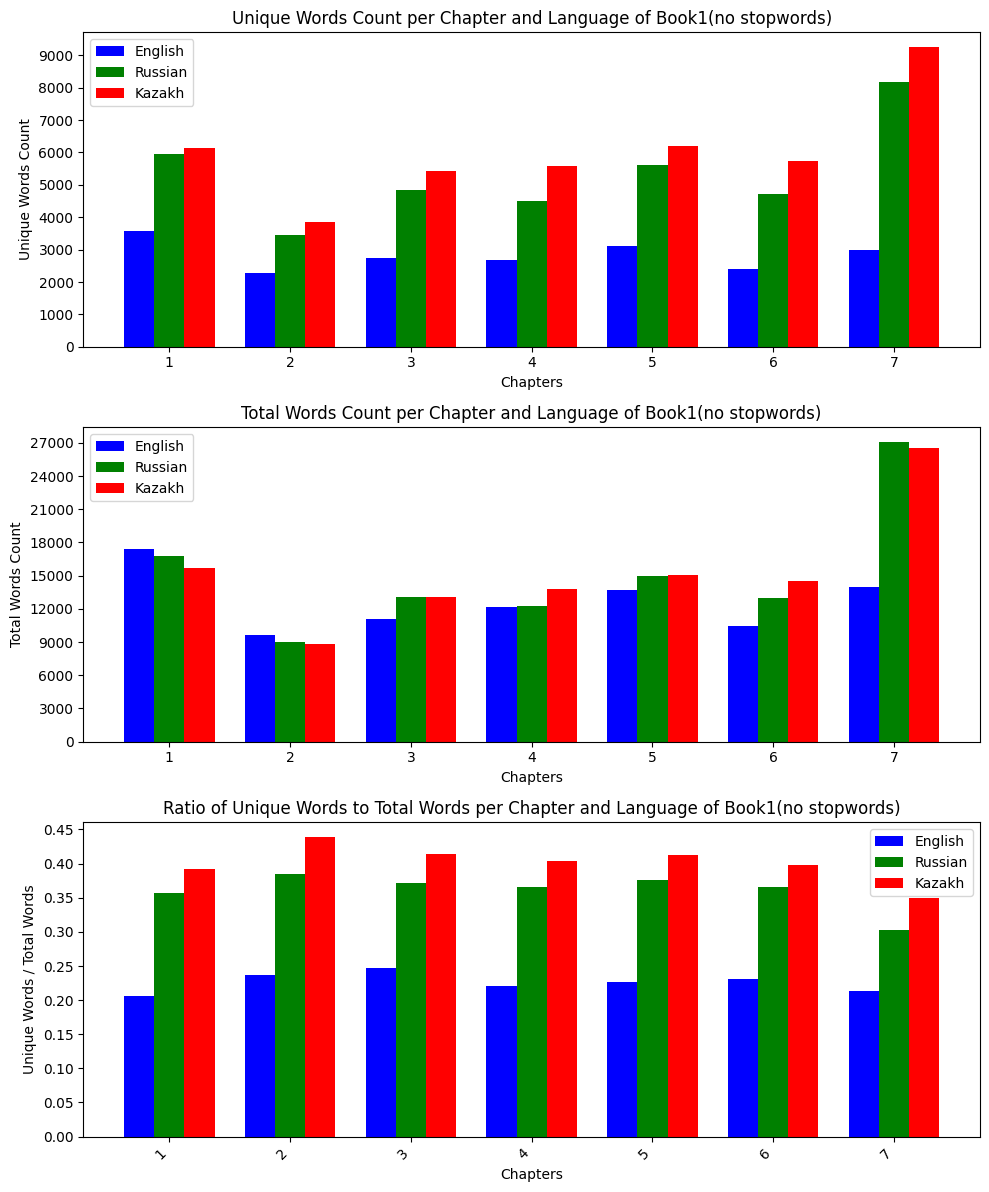

In [208]:
import matplotlib.pyplot as plt
import numpy as np

# Language names
language_names = ['English', 'Russian', 'Kazakh']

# Language colors
language_colors = ['blue', 'green', 'red']

# Combine all data dictionaries
all_data = [ttr_en_p1, ttr_ru_p1, ttr_kz_p1]

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))  # Create subplots

# Plot for unique words count
index = np.arange(len(all_data[0]))
bar_width = 0.25

for i, data in enumerate(all_data):
    unique_counts = [chapter_data['unique_words_count'] for chapter_data in data.values()]
    chapters = list(data.keys())
    ax1.bar(index + i * bar_width, unique_counts, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for unique words count
ax1.set_xlabel('Chapters')
ax1.set_ylabel('Unique Words Count')
ax1.set_title('Unique Words Count per Chapter and Language of Book1(no stopwords)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(range(1, 8))
ax1.legend()

# Plot for total words count
for i, data in enumerate(all_data):
    total_counts = [chapter_data['total_words_count'] for chapter_data in data.values()]
    chapters = list(data.keys())
    ax2.bar(index + i * bar_width, total_counts, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for total words count
ax2.set_xlabel('Chapters')
ax2.set_ylabel('Total Words Count')
ax2.set_title('Total Words Count per Chapter and Language of Book1(no stopwords)')
ax2.set_xticks(index + bar_width)
ax2.set_xticklabels(range(1, 8))
ax2.legend()

# Plot for ratio of unique words to total words
for i, data in enumerate(all_data):
    unique_counts = [chapter_data['unique_words_count'] for chapter_data in data.values()]
    total_counts = [chapter_data['total_words_count'] for chapter_data in data.values()]
    ratios = [unique / total for unique, total in zip(unique_counts, total_counts)]
    ax3.bar(index + i * bar_width, ratios, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for ratio plot
ax3.set_xlabel('Chapters')
ax3.set_ylabel('Unique Words / Total Words')
ax3.set_title('Ratio of Unique Words to Total Words per Chapter and Language of Book1(no stopwords)')
ax3.set_xticks(index + bar_width)
ax3.set_xticklabels(range(1, 8))
ax3.legend()

# Increase y-axis ticks
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax3.yaxis.set_major_locator(plt.MaxNLocator())

# Adjust layout
plt.tight_layout()

# Show plot
plt.xticks(rotation=45, ha='right')
plt.show()

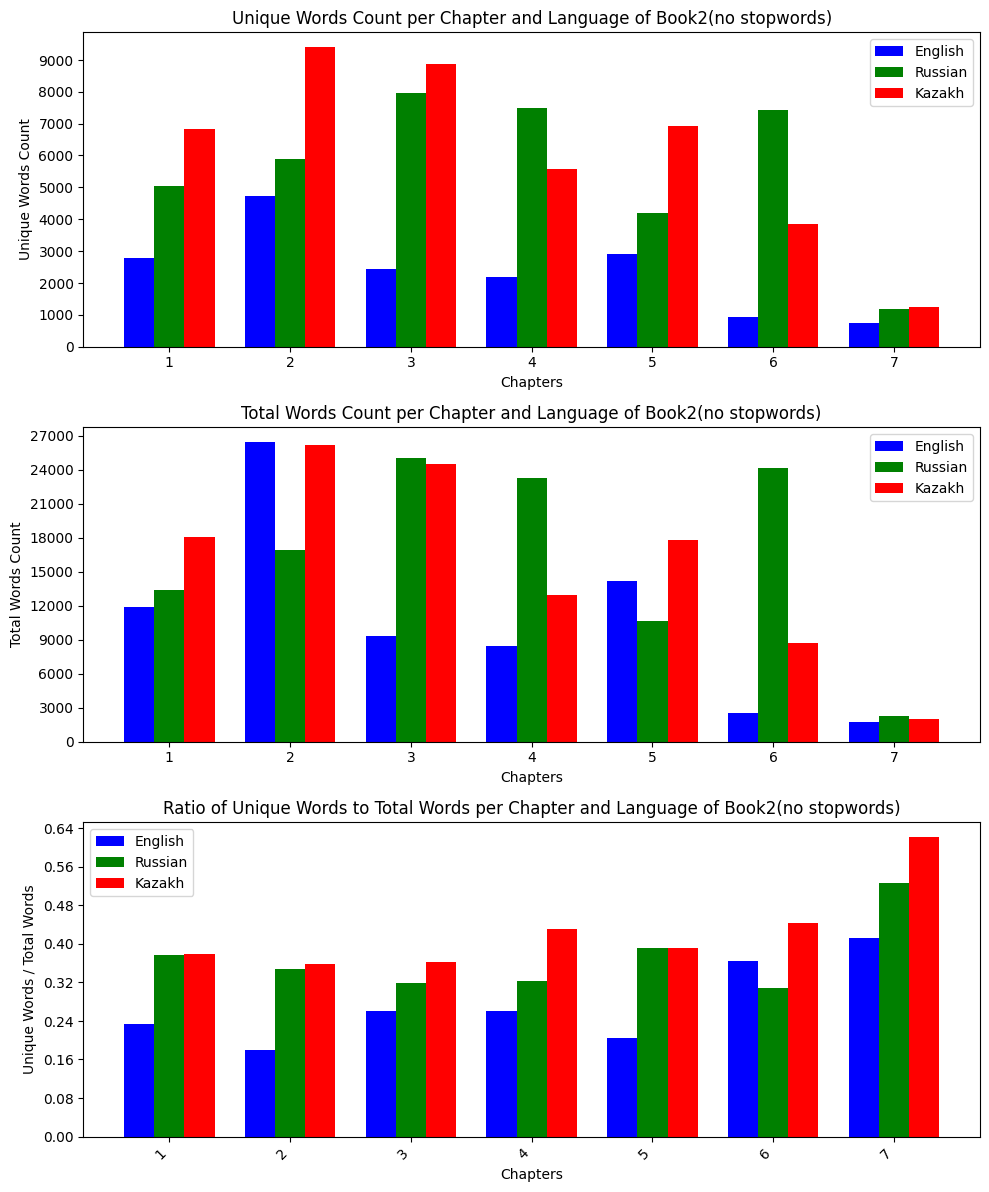

In [209]:
import matplotlib.pyplot as plt
import numpy as np

# Language names
language_names = ['English', 'Russian', 'Kazakh']

# Language colors
language_colors = ['blue', 'green', 'red']

# Combine all data dictionaries
all_data = [ttr_en_p2, ttr_ru_p2, ttr_kz_p2]

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))  # Create subplots

# Plot for unique words count
index = np.arange(len(all_data[0]))
bar_width = 0.25

for i, data in enumerate(all_data):
    unique_counts = [chapter_data['unique_words_count'] for chapter_data in data.values()]
    chapters = list(data.keys())
    ax1.bar(index + i * bar_width, unique_counts, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for unique words count
ax1.set_xlabel('Chapters')
ax1.set_ylabel('Unique Words Count')
ax1.set_title('Unique Words Count per Chapter and Language of Book2(no stopwords)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(range(1, 8))
ax1.legend()

# Plot for total words count
for i, data in enumerate(all_data):
    total_counts = [chapter_data['total_words_count'] for chapter_data in data.values()]
    chapters = list(data.keys())
    ax2.bar(index + i * bar_width, total_counts, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for total words count
ax2.set_xlabel('Chapters')
ax2.set_ylabel('Total Words Count')
ax2.set_title('Total Words Count per Chapter and Language of Book2(no stopwords)')
ax2.set_xticks(index + bar_width)
ax2.set_xticklabels(range(1, 8))
ax2.legend()

# Plot for ratio of unique words to total words
for i, data in enumerate(all_data):
    unique_counts = [chapter_data['unique_words_count'] for chapter_data in data.values()]
    total_counts = [chapter_data['total_words_count'] for chapter_data in data.values()]
    ratios = [unique / total for unique, total in zip(unique_counts, total_counts)]
    ax3.bar(index + i * bar_width, ratios, bar_width, color=language_colors[i], label=language_names[i])

# Adding labels and title for ratio plot
ax3.set_xlabel('Chapters')
ax3.set_ylabel('Unique Words / Total Words')
ax3.set_title('Ratio of Unique Words to Total Words per Chapter and Language of Book2(no stopwords)')
ax3.set_xticks(index + bar_width)
ax3.set_xticklabels(range(1, 8))
ax3.legend()

# Increase y-axis ticks
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax3.yaxis.set_major_locator(plt.MaxNLocator())

# Adjust layout
plt.tight_layout()

# Show plot
plt.xticks(rotation=45, ha='right')
plt.show()

In [210]:
def ttr_per_book(chapters_list, book_json, stopwords, part):
    ttr = {}
    unique_words = set()
    total_words_count = 0
    for chapter in chapters_list:
        for sentence in book_json[part][chapter]:
            for word in sentence:
                if word not in stopwords:
                    total_words_count += 1
                    if word not in unique_words:
                        unique_words.add(word)
    ttr = {
        "unique_words_count": len(unique_words),
        "total_words_count": total_words_count,
    }
    return ttr

In [211]:
ttr_en_p1 = ttr_per_book(en_chapters_part1, en, stop_words_en, "part1")
ttr_en_p2 = ttr_per_book(en_chapters_part2, en, stop_words_en, "part2")
ttr_ru_p1 = ttr_per_book(ru_chapters_part1, ru, stop_words_ru, "part1")
ttr_ru_p2 = ttr_per_book(ru_chapters_part2, ru, stop_words_ru, "part2")
ttr_kz_p1 = ttr_per_book(kz_chapters_part1, kz, stop_words_kz, "part1")
ttr_kz_p2 = ttr_per_book(kz_chapters_part2, kz, stop_words_kz, "part2")

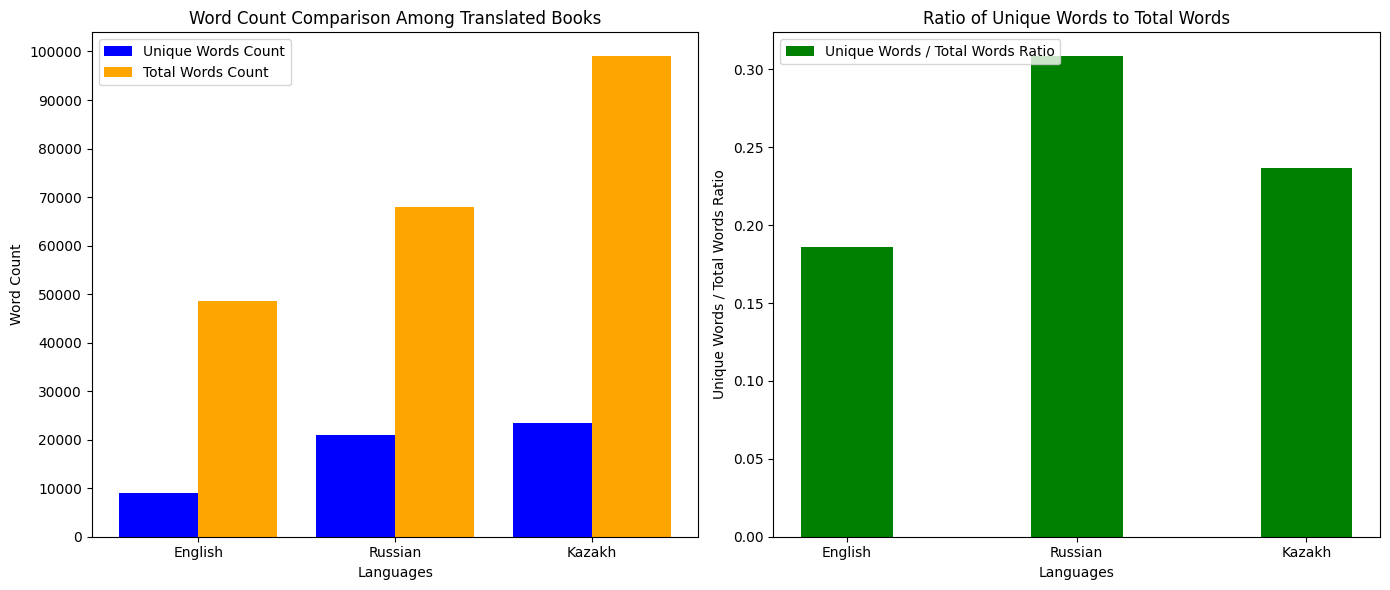

In [212]:
import matplotlib.pyplot as plt

# Data
data = [ttr_en_p1, ttr_ru_p1, ttr_kz_p1]
# Extracting data for plotting
languages = ['English', 'Russian', 'Kazakh']
unique_words_counts = [entry['unique_words_count'] for entry in data]
total_words_counts = [entry['total_words_count'] for entry in data]

# Calculate the ratio of unique words to total words
ratios = [unique / total for unique, total in zip(unique_words_counts, total_words_counts)]

# Set the width of the bars
bar_width = 0.4

# Define the positions of the bars
index = range(len(languages))

# Plotting
plt.figure(figsize=(14, 6))

# First plot (bar plot)
plt.subplot(1, 2, 1)
plt.bar([i - bar_width/2 for i in index], unique_words_counts, color='blue', width=bar_width, label='Unique Words Count')
plt.bar([i + bar_width/2 for i in index], total_words_counts, color='orange', width=bar_width, label='Total Words Count')

# Adding labels and title for the first plot
plt.xlabel('Languages')
plt.ylabel('Word Count')
plt.title('Word Count Comparison Among Translated Books')
plt.legend(loc='upper left')

# Adding more ticks to Y-axis for the first plot
plt.yticks(range(0, max(total_words_counts) + 10000, 10000))

# Set the x-axis labels for the first plot
plt.xticks(index, languages)

# Second plot (bar plot for ratio)
plt.subplot(1, 2, 2)
plt.bar(index, ratios, color='green', width=bar_width, label='Unique Words / Total Words Ratio')

# Adding labels and title for the second plot
plt.xlabel('Languages')
plt.ylabel('Unique Words / Total Words Ratio')
plt.title('Ratio of Unique Words to Total Words')

# Adding legend for the second plot
plt.legend(loc='upper left')

# Set the x-axis labels for the second plot
plt.xticks(index, languages)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# MLTD (Measure of Textual Lexical Diversity)

In [213]:
from collections import Counter

def calculate_mtld(chapters):
    mtld_scores = {}
    all_mtld_scores = []
    
    for chapter_name, chapter_sentences in chapters.items():
        word_count = 0
        unique_words = set()
        chapter_mtld_scores = []
        
        for sentence in chapter_sentences:
            for word in sentence:
                word_count += 1
                if word not in unique_words:
                    unique_words.add(word)
                
                if word_count % 100 == 0:
                    # Calculate TTR for the current window
                    ttr = len(unique_words) / 100
                    chapter_mtld_scores.append(ttr)
                    
                    # Create a new set for the next window
                    unique_words = set()
        
        # Calculate mean MTLD score for the current chapter
        mean_mtld = sum(chapter_mtld_scores) / len(chapter_mtld_scores)
        mtld_scores[chapter_name] = mean_mtld
        all_mtld_scores.extend(chapter_mtld_scores)
    # Calculate mean MTLD score for the entire book
    mean_mtld_book = sum(all_mtld_scores) / len(all_mtld_scores)
    return mean_mtld_book, mtld_scores

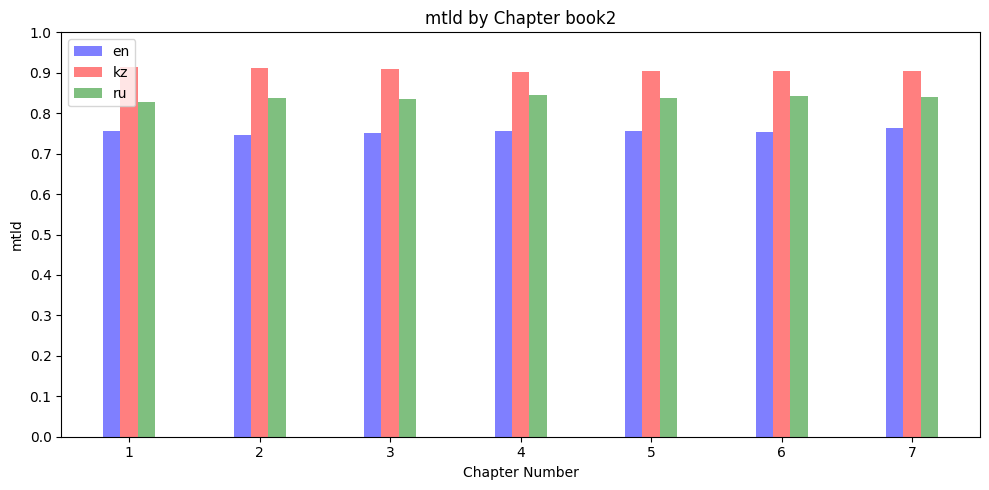

In [217]:
mtld_en_part1 = calculate_mtld(en["part1"])
mtld_kz_part1 = calculate_mtld(kz["part1"])
mtld_ru_part1 = calculate_mtld(ru["part1"])
plt.figure(figsize=(10, 5))
bar_width = 0.2

chapter_values = []
for i in range(1, 8):
    chapter_values.append((mtld_en_part1[1].popitem()[1], mtld_kz_part1[1].popitem()[1], mtld_ru_part1[1].popitem()[1]))

for i, values in enumerate(chapter_values):
    plt.bar(i * 1.5, values[0], color='blue', alpha=0.5, width=bar_width)
    plt.bar(i * 1.5 + bar_width, values[1], color='red', alpha=0.5, width=bar_width)
    plt.bar(i * 1.5 + 2 * bar_width, values[2], color='green', alpha=0.5, width=bar_width)

# Adding labels and legend
plt.xlabel('Chapter Number')
plt.ylabel('mtld')
plt.title('mtld by Chapter book2')
plt.xticks([i * 1.5 + bar_width for i in range(7)], range(1, 8))
plt.legend(['en', 'kz', 'ru'])

# Adding more y ticks
plt.yticks(np.arange(0, max([max(sublist) for sublist in chapter_values]) + 0.1, 0.1))

plt.tight_layout()
plt.show()

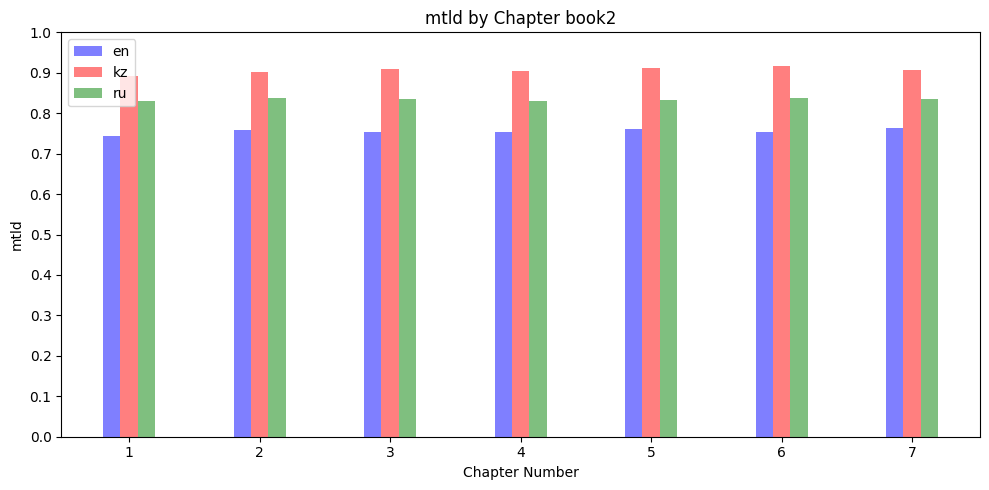

In [218]:
mtld_en_part2 = calculate_mtld(en["part2"])
mtld_kz_part2 = calculate_mtld(kz["part2"])
mtld_ru_part2 = calculate_mtld(ru["part2"])
plt.figure(figsize=(10, 5))
bar_width = 0.2

chapter_values = []
for i in range(1, 8):
    chapter_values.append((mtld_en_part2[1].popitem()[1], mtld_kz_part2[1].popitem()[1], mtld_ru_part2[1].popitem()[1]))

for i, values in enumerate(chapter_values):
    plt.bar(i * 1.5, values[0], color='blue', alpha=0.5, width=bar_width)
    plt.bar(i * 1.5 + bar_width, values[1], color='red', alpha=0.5, width=bar_width)
    plt.bar(i * 1.5 + 2 * bar_width, values[2], color='green', alpha=0.5, width=bar_width)

# Adding labels and legend
plt.xlabel('Chapter Number')
plt.ylabel('mtld')
plt.title('mtld by Chapter book2')
plt.xticks([i * 1.5 + bar_width for i in range(7)], range(1, 8))
plt.legend(['en', 'kz', 'ru'])

# Adding more y ticks
plt.yticks(np.arange(0, max([max(sublist) for sublist in chapter_values]) + 0.1, 0.1))

plt.tight_layout()
plt.show()